# Práctica 2. Continuación

## SOM como un __Clasificador__

Los mapas auto-organizativos de Kohonen también se pueden utilizar como clasificadores mediante un aprendizaje supervisado que utiliza parte de los datos para entrenar la red y ajustar los pesos de cada neurona de manera que se minimize el error de salida y deja otra parte de los datos para comprobar si el entrenamiento ha sido eficaz.

## Ejemplo 1. Selección de un conjunto de entrenamiento 

Elige de manera aleatoria un conjunto de entrenamiento que contenga un 70\% de los datos de `som.wine` (manteniendo la primera columna que contiene la información de la bodega de origen). A partir de este conjunto, creamos el conjunto de entrenamiento y el conjunto de comprobación escalados. 

Para que la comparación sea adecuada, el segundo se debe escalar con referencia al conjunto de entrenamiento. A partir de éstos, creamos dos listas donde detallamos el conjunto que se va comprobar respecto a que atributo, en nuestro caso, las bodegas (`Cultivars`)

Las bodegas son:
> Cultivars grapes = (Nebbiolo, Barberas, Grignolino)

In [1]:
#!git clone https://github.com/cgg-upm/upm-dma-som
#!dir upm-dma-som\som
#!copy upm-dma-som\som\som.py .\*.*
#!copy upm-dma-som\som\utils.py .\*.*

In [2]:
from som import som
from utils import somutils

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [5]:
# Se preparan las columnas a tratar
df_wine = pd.read_csv('data/wine.csv', header=None)
df_wine.columns = ['label', 'alcohol',
    'malic acid', 'ash',
    'ash alkalinity',
    'magnesium', 'tot. phenols',
    'flavanoids', 'non-flav. phenols',
    'proanth',
    'col. int.', 'col. hue',
    'OD ratio'
    ,'proline']
# Se borra la columna de la etiqueta
#df_wine = df_wine.drop('label', axis=1)
df_wine.head()

,label,alcohol,malic acid,ash,ash alkalinity,magnesium,tot. phenols,flavanoids,non-flav. phenols,proanth,col. int.,col. hue,OD ratio,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
X, y = df_wine.values[:,1:14], df_wine.values[:,0]
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_train, X_test, y_train, y_test =train_test_split(X_std, y, test_size=0.3, random_state=1, stratify=y)

In [7]:
df = pd.DataFrame(X_train)
df.columns = ['alcohol',
    'malic acid', 'ash',
    'ash alkalinity',
    'magnesium', 'tot. phenols',
    'flavanoids', 'non-flav. phenols',
    'proanth',
    'col. int.', 'col. hue',
    'OD ratio'
    ,'proline']
df.head()

,alcohol,malic acid,ash,ash alkalinity,magnesium,tot. phenols,flavanoids,non-flav. phenols,proanth,col. int.,col. hue,OD ratio,proline
0,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
1,-0.284874,0.981731,-1.412851,-1.049479,-1.386122,-1.065731,-0.782361,0.549108,-1.333159,-0.717240,-1.129518,-0.694478,-1.193845
2,0.209232,2.561618,-0.170035,0.752231,-0.473348,-0.889474,-1.404820,1.999513,-0.071658,1.229325,-1.568252,-1.598441,-0.069719
3,-0.346638,-0.526343,-0.316249,0.902373,-1.105268,-1.466313,-0.270338,0.951998,0.068508,-0.760497,-0.339797,-0.270745,-0.824444
4,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148


In [8]:
cultivares=['Nebbiolo', 'Barberas', 'Grignolino']
y_cultivar = [ cultivares[int(lbl)-1] for lbl in y_train]
df = pd.DataFrame(y_cultivar)
df.columns = ['Cultivar']
df.head()

,Cultivar
0,Nebbiolo
1,Barberas
2,Grignolino
3,Barberas
4,Nebbiolo


## Ejercicio 1.  Clasificación del conjunto de entrenamiento y cálculo de errores

Utiliza un SOM del mismo tamaño y malla que en la sección anterior y el comando `supersom` del paquete `kohonen` para obtener la clasificación del conjunto `testdata`. 

Halla la matriz de confusion y dertermina el error cometido en la clasificación.

In [9]:
nrows = 20
ncols = 20
smm = som(nrows=nrows,ncols=ncols)

In [10]:
smm.train_super_SOM(train_data=X_train, y_train=y_train, epochs=1000)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 147.94it/s]


In [12]:
y_pred = smm.getPredict(X_train)
smm.score(y_pred, y_train)

0.9838709677419355

In [13]:
y_pred = smm.getPredict(X_test)
smm.score(y_pred, y_test)

0.9814814814814815

### Matriz de confusión

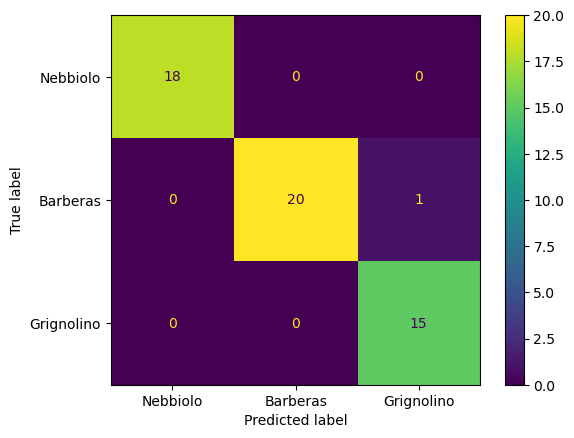

In [14]:
CMD = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_pred), display_labels=cultivares).plot()

### Mapa con las estimaciones

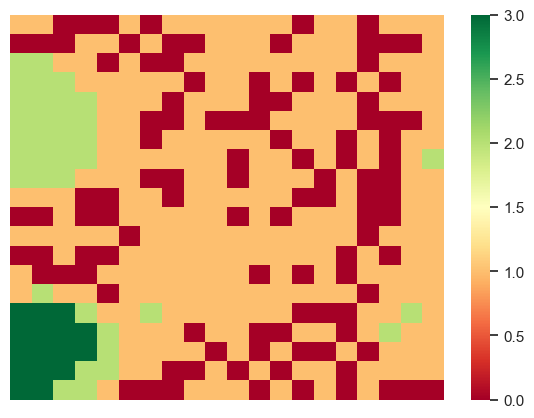

In [16]:
somutils.plotEstimationMap(pSom=smm, figsize=(7,5))

## Ejercicio

Repite la práctica (_clustering_ y clasificación) usando:
* subconjuntos de los datos `wine` (nota: _scatter matrix_)
* variando los parámetros del SOM (neuronas, funciones)
Compara los resultados obtenidos.